# Ernesto Antonio Reyes Ramírez 

# Tarea 2

# Aprendizaje Máquina

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

# Importamos la base de datos de Iris
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [2]:
#Como se menciona en las instrucciones solo utilizaremos las clases 0 y 1
X = X[:100]
Y = Y[:100]

In [3]:
#Además vamos a utilizar solo las caracteristicas de ancho y largo del sepalo, que son las dos primeras entradas
# de X

X = X[:, :2]  

In [4]:
#Gradiente de la función de entropia cruzada binaria

#Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_BCE(theta, f_params):
    X = f_params['X']
    y = f_params['y']
    
    h = sigmoid(X@theta)
    J = (1/y.size)*sum(-y*np.log(h) - (1-y)*np.log(1 - h))
    
    return J

def Binary_Cross_Entropy(theta, f_params):   
    X = f_params['X']
    y = f_params['y']
    
    h = sigmoid(X@theta)
    gradient = np.dot(X.T, (h - y)) / y.size
    return gradient

# Descenso de gradiente estocástico 

In [5]:
def SGD(theta=[], grad=None, gd_params=[], f_params=[]):
    '''
    Descenso de gradiente estocástico
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      batch_size = gd_params['batch_size'] tamaño de la muestra
                      
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   
                  
    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    (high,dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    
    nIter      = gd_params['nIter']
    alpha      = gd_params['alpha']
        
    Theta=[]
    for t in range(nIter):
        # Set of sampled indices
        smpIdx = np.random.randint(low=0, high=high, size=batch_size, dtype='int32')
        # sample 
        smpX = f_params['X'][smpIdx]
        smpy = f_params['y'][smpIdx]
        # parametros de la funcion objetivo
        smpf_params ={'X'     : smpX , 
                      'y'     : smpy}
        
        p = grad(theta,f_params=smpf_params)
        theta = theta - alpha*p
        Theta.append(theta)
        
    return np.array(Theta)

# Descenso de gradiente estocástico - Inercia

In [6]:
def MGD(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de gradiente con momento (inercia)
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      eta   = gd_params['eta']  parametro de inercia (0,1]
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    p_old = np.zeros(theta.shape)
    Theta=[]
    for t in range(nIter):
        g = grad(theta, f_params=f_params)
        p = g + eta*p_old
        theta = theta - alpha*p
        p_old=p
        Theta.append(theta)
    return np.array(Theta)

# Nesterov 

In [7]:
def NAG(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso acelerado de Nesterov
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      eta   = gd_params['eta']  parametro de inercia (0,1]
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    p     = np.zeros(theta.shape)
    Theta=[]
    
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g = grad(pre_theta, f_params=f_params)
        p = g + eta*p
        theta = theta - alpha*p
        Theta.append(theta)
    return np.array(Theta)

# ADAM

In [8]:
def ADAM(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de Gradiente Adaptable con Momentum(A DAM) 
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter    = gd_params['nIter'] número de iteraciones
                      alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                      eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                 de descenso (0,1)
                      eta2     = gd_params['eta2'] factor de momentum para la el 
                                 tamaño de paso (0,1)
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    epsilon= 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADAM'] 
    eta1     = gd_params['eta1']
    eta2     = gd_params['eta2']
    p        = np.zeros(theta.shape)
    v        = 0.0
    Theta    = []
    eta1_t = eta1
    eta2_t = eta2
    for t in range(nIter):
        g  = grad(theta, f_params=f_params)
        p  = eta1*p + (1.0-eta1)*g
        v  = eta2*v + (1.0-eta2)*(g**2)
        #p = p/(1.-eta1_t)
        #v = v/(1.-eta2_t)
        theta = theta - alpha * p / (np.sqrt(v)+epsilon)
        eta1_t *= eta1
        eta2_t *= eta2
        Theta.append(theta)
    return np.array(Theta)

# Evaluación de los modelos

In [9]:
# condición inicial
theta=10*np.random.normal(size=2)

In [10]:
# parámetros del algoritmo
gd_params = {'alpha'          : 0.95, 
             'alphaADADELTA'  : 0.7,
             'alphaADAM'      : 0.95,
             'nIter'          : 300,
             'batch_size'     : 100,
             'eta'            : 0.9,
             'eta1'           : 0.9,
             'eta2'           : 0.999}

# parámetros de la función objetivo
f_params={'X'     : X , 
          'y'     : Y}

In [11]:
#Descenso de gradiente estocástico

ThetaSGD = SGD(theta=theta, grad=Binary_Cross_Entropy,gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaSGD[-1,:])

Inicio: [-3.16451738  0.82147483] -> Fin: [ 5.17395233 -8.94328068]


In [12]:
ThetaMGD = MGD(theta=theta, grad=Binary_Cross_Entropy,gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaMGD[-1,:])

Inicio: [-3.16451738  0.82147483] -> Fin: [ 19.84922879 -35.13456927]


In [13]:
ThetaNAG = NAG(theta=theta, grad=Binary_Cross_Entropy,gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaMGD[-1,:])

Inicio: [-3.16451738  0.82147483] -> Fin: [ 19.84922879 -35.13456927]


In [14]:
ThetaADAM = ADAM(theta=theta, grad=Binary_Cross_Entropy, gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaADAM[-1,:])

Inicio: [-3.16451738  0.82147483] -> Fin: [  7.53573981 -13.21085082]


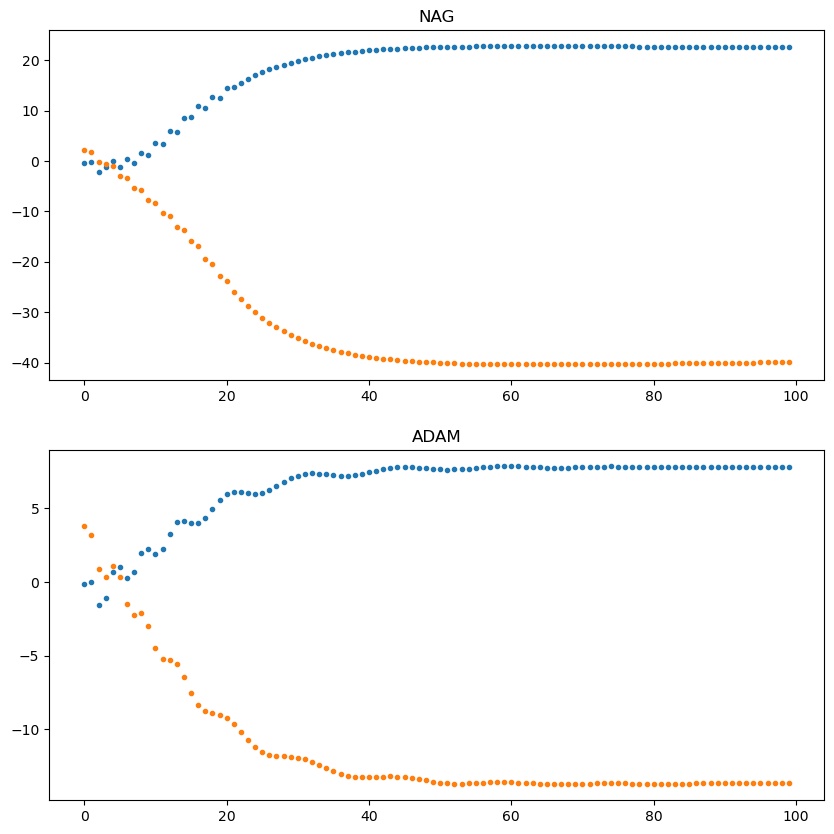

In [15]:
Tmax=100
plt.figure(figsize=(10,10))


plt.subplot(211)
plt.plot(ThetaNAG[:Tmax], '.')
plt.title('NAG')

plt.subplot(212)
plt.plot(ThetaADAM[:Tmax], '.')
plt.title('ADAM')

plt.show()

# Graficar el avance de los métodos de descenso

# Descenso de gradiente estocástico

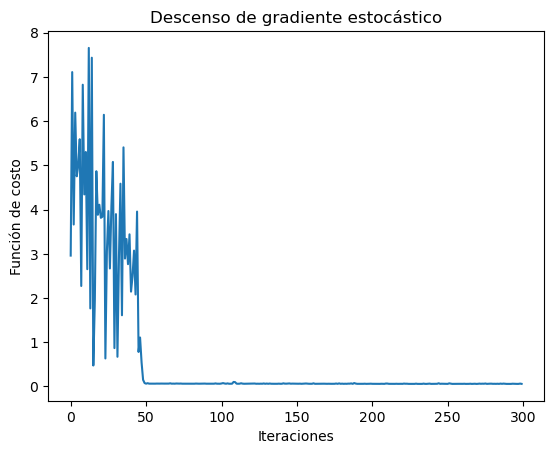

In [16]:
n1 = len(ThetaSGD)

l = list(range(n1))
p = [cost_BCE(ThetaSGD[i], f_params) for i in range(n1)]

plt.plot(l,p)
plt.xlabel('Iteraciones')
plt.ylabel('Función de costo')
plt.title('Descenso de gradiente estocástico')
plt.show()

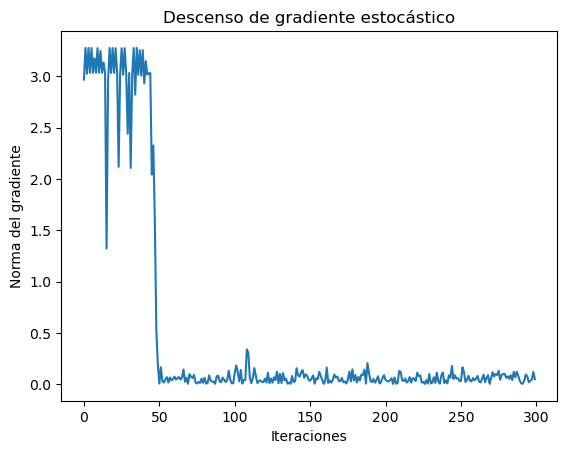

In [17]:
q = [np.linalg.norm(Binary_Cross_Entropy(ThetaSGD[i], f_params)) for i in range(n1)]

plt.plot(l,q)
plt.xlabel('Iteraciones')
plt.ylabel('Norma del gradiente')
plt.title('Descenso de gradiente estocástico')
plt.show()

# Descenso de gradiente estocástico- Inercia

/tmp/ipykernel_37062/1325635577.py:12: RuntimeWarning: divide by zero encountered in log
  J = (1/y.size)*sum(-y*np.log(h) - (1-y)*np.log(1 - h))
/tmp/ipykernel_37062/1325635577.py:12: RuntimeWarning: invalid value encountered in multiply
  J = (1/y.size)*sum(-y*np.log(h) - (1-y)*np.log(1 - h))


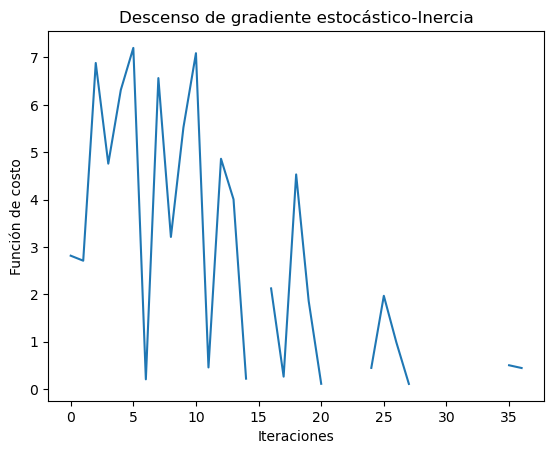

In [19]:
n2 = len(ThetaMGD)

l = list(range(n2))
p = [cost_BCE(ThetaMGD[i], f_params) for i in range(n2)]

plt.plot(l,p)
plt.xlabel('Iteraciones')
plt.ylabel('Función de costo')
plt.title('Descenso de gradiente estocástico-Inercia')
plt.show()

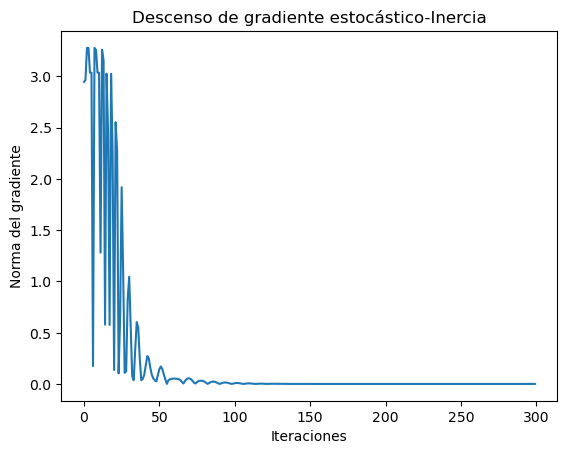

In [21]:
q = [np.linalg.norm(Binary_Cross_Entropy(ThetaMGD[i], f_params)) for i in range(n2)]

plt.plot(l,q)
plt.xlabel('Iteraciones')
plt.ylabel('Norma del gradiente')
plt.title('Descenso de gradiente estocástico-Inercia')
plt.show()

# Nesterov

/tmp/ipykernel_37062/1325635577.py:12: RuntimeWarning: divide by zero encountered in log
  J = (1/y.size)*sum(-y*np.log(h) - (1-y)*np.log(1 - h))
/tmp/ipykernel_37062/1325635577.py:12: RuntimeWarning: invalid value encountered in multiply
  J = (1/y.size)*sum(-y*np.log(h) - (1-y)*np.log(1 - h))


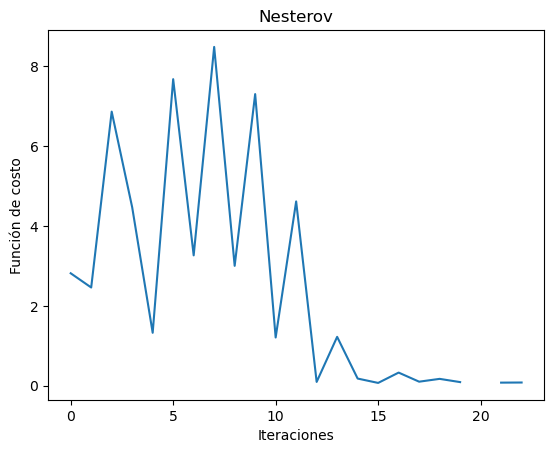

In [27]:
n3 = len(ThetaNAG)

l = list(range(n3))
p = [cost_BCE(ThetaNAG[i], f_params) for i in range(n3)]

plt.plot(l,p)
plt.xlabel('Iteraciones')
plt.ylabel('Función de costo')
plt.title('Nesterov')
plt.show()

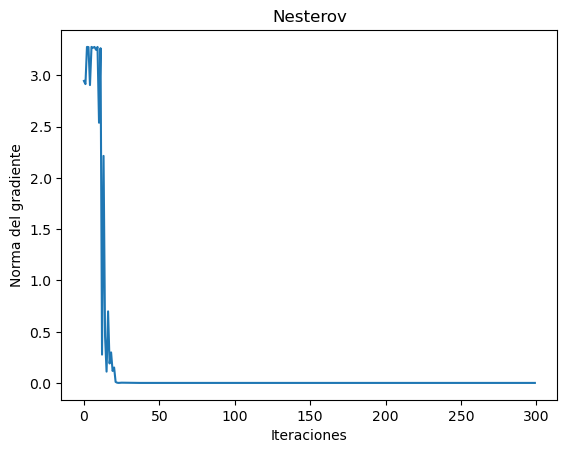

In [23]:
q = [np.linalg.norm(Binary_Cross_Entropy(ThetaNAG[i], f_params)) for i in range(n3)]

plt.plot(l,q)
plt.xlabel('Iteraciones')
plt.ylabel('Norma del gradiente')
plt.title('Nesterov')
plt.show()

# ADAM

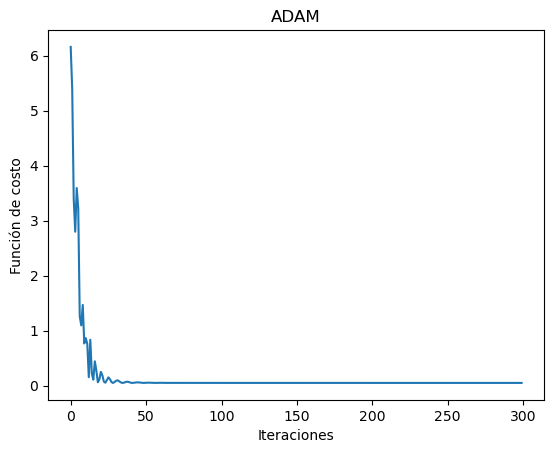

In [30]:
n4 = len(ThetaADAM)

l = list(range(n4))
p = [cost_BCE(ThetaADAM[i], f_params) for i in range(n4)]

plt.plot(l,p)
plt.xlabel('Iteraciones')
plt.ylabel('Función de costo')
plt.title('ADAM')
plt.show()

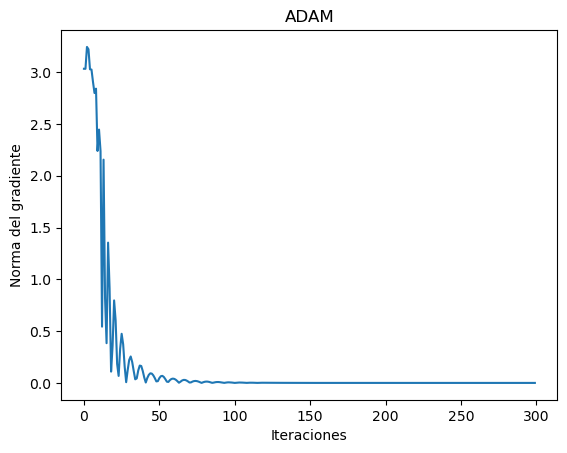

In [29]:
q = [np.linalg.norm(Binary_Cross_Entropy(ThetaADAM[i], f_params)) for i in range(n4)]

plt.plot(l,q)
plt.xlabel('Iteraciones')
plt.ylabel('Norma del gradiente')
plt.title('ADAM')
plt.show()